# Input and Output

## Opening files

How to open a file ?

`f = open(filename, mode='r')`

modes can be:
* `r` for read-only mode
* `w` for write mode
* `a` for append mode
* `+` for read+write mode
* `b` for binary mode (disable encoding handling)


Common methods for all file objects:
* `f.close()` → close the file
* `seek(pos)` → Moves to a given position in the file

## Writing into a file

- `file.write(str)` → write a string to the file
- `file.writelines([list of strings])` → write multiple lines
- `file.flush()` → write (actually) the data to the disk


In [1]:
import time
fn1 = "example_io1"

f = open(fn1, "w")
f.write("It is now: " + time.ctime())
f.flush() #Optional
f.close() # Mandatory

## Reading from a file


- `file.read(size)` → read size bytes or the whole file in a string
- `file.readlines()` → read the whole file in a list of lines
- `file.readline()` → read the next line


In [2]:
print(time.ctime())
print(open(fn1).read())

Fri Sep 21 10:53:57 2018
It is now: Fri Sep 21 10:53:57 2018


**Nota:** In the former cell, the file may not be closed immediately as the garbage collection can be delayed. As the number of opened files is limited at ~1000 per process, it is always better to explicitely close files. This is best achieved using a `context manager`.

### Context manager

Context managers allow you to allocate and release resources precisely when you want to. The most widely used example of context managers is the with statement. Suppose you have two related operations which you’d like to execute as a pair, with a block of code in between. Context managers allow you to do specifically that. For example:

In [3]:
with open('some_file', 'w') as opened_file:
    opened_file.write('Hi there!')

The above code opens the file, writes some data to it and then closes it. If an error occurs while writing the data to the file, it tries to close it. The above code is equivalent to:

In [4]:
file = open('some_file', 'w')
try:
    file.write('Hi there!')
finally:
    file.close()

While comparing it to the first example we can see that a lot of boilerplate code is eliminated just by using with. The main advantage of using a with statement is that it makes sure our file is closed without paying attention to how the nested block exits.

A common use case of context managers is locking and unlocking resources and closing opened files.

## File as iterator

Files can behave as iterators over readlines

In [5]:
for line in open(fn1):
    print(line)

It is now: Fri Sep 21 10:53:57 2018


will display:
```
    first line
    second line
    ...
```
* Very concise typing
* Efficient reading
* Limited memory footprint
* File is not fully loaded in memory: only one line at a time



## Interaction with the console

- Output to the console:
    - `print(str)` used to be a statement (now function behaviour is enforced)
    - `sys.stdout` is a file opend in write mode:
    - `sys.stdout.write(str+os.linesep)` is equivalent to `print(str)`

- Input from the console:
    - `input()` reads the standard input and returns a string (`raw_input` in python2)
    - `sys.stdin` is a file open in read mode:

- Stdin, stdout and stderr are just opened files …

In [6]:
import sys
print(sys.stdout)
print(sys.stdin)

<_io.TextIOWrapper name='<stdin>' mode='r' encoding='UTF-8'>


## Exercise


Create a function asking for the name and the age of the user and then display it

```
>>> What is your name ?
polo
>>> How old are you ? 
22
>>> Your name is polo and you are 22 years old
```

### Solution


In [7]:
def questioner():
    print("What is your name ?")
    name = input()
    print("How old are you ? ")
    age = input()
    print("Your name is %s and you are %s years old" % (name, age))

questioner()

What is your name ?
Guido
How old are you ? 
62
Your name is Guido and you are 62 years old


## Exercise

write into a file:

    - your name
    - the current date

Then read back this file and parse it to retrieve the month of the date.
Use only the functions given by the file object (the one returned by open(...))

### Solution - writing

In [8]:
import time
with open('myoutputfile', mode='w') as opened_file:
    opened_file.write('Jerome\n')
    opened_file.write(time.ctime())

### Solution - reading

In [9]:
# reading
with open('myoutputfile', mode='r') as f:
    # read the first line with the name
    firstline = f.readline()
    # read the second line with the date
    secondline = f.readline()
    month = secondline.split()[1]
print("month is %s"%month)


month is Sep


## Exercise

Read an ascii spreadsheet written by FIT2D:

- The first non commented line looks like:
    - 512 512 Start pixel = ( 1 1 )
    - Then 512 values per line, 512 lines
- Read the file as a list of lists
- Example file in : data/example.spr


![FIT2D image saved in ASCII](img/fit2d_ascii_file.png "FIT2D image saved in ASCII")


### Solution

In [10]:
def readspr(filepath):
    "Read a FIT2D ascii spread file"
    result = []
    xsize = 0
    ysize = 0
    with open(filepath, 'r') as opened_file:
        for idx, line in enumerate(opened_file):
            strippedline = line.strip()
            # if this is a commented line
            if strippedline.startswith('#'):
                continue
            words = strippedline.split()
            if(len(words) == 8) and (words[2:6] == ["Start", "pixel", "=", "("]):
                xsize = int(words[0])
                ysize = int(words[1])
                print("Dimensions of the size are (%s, %s)" %(xsize, ysize))
                break
        if xsize and ysize:
            for line in opened_file:
                words = line.split()
                if len(words) != xsize:
                    print("Error !!! Expected entries are %s, got %s"%(xsize, len(words)))
                    return None
                else:
                    result.append([float(i) for i in words])               
    return result

data = readspr("data/example.spr")

Dimensions of the size are (512, 512)


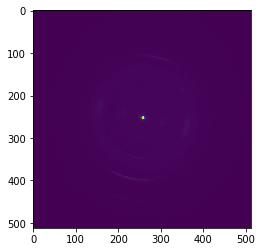

In [11]:
#Display the image
%matplotlib inline
from matplotlib.pyplot import subplots

fig, ax = subplots()
ax.imshow(data)